In [2]:
# 데이터 로드
import pandas as pd

data = pd.read_csv("../../data files/StudentsPerformance.csv")

In [3]:
# 데이터 확인
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Text(0.5, 1.0, 'test preparation course')

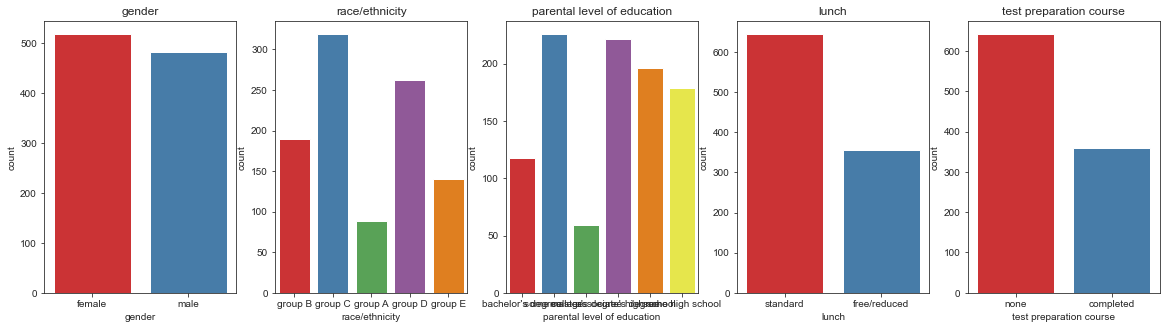

In [68]:
# 범주형 변수의 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

sns.set_style("ticks")
sns.countplot(x = 'gender', palette = 'Set1', data = data,ax=ax1)
ax1.set_title("gender")
sns.countplot(x = 'race/ethnicity', palette = 'Set1', data = data,ax=ax2)
ax2.set_title("race/ethnicity")
sns.countplot(x = 'parental level of education', palette = 'Set1', data = data,ax=ax3)
ax3.set_title("parental level of education")
sns.countplot(x = 'lunch', palette = 'Set1', data = data,ax=ax4)
ax4.set_title("lunch")
sns.countplot(x = 'test preparation course', palette = 'Set1', data = data,ax=ax5)
ax5.set_title("test preparation course")

Text(0.5, 1.0, 'writing score')

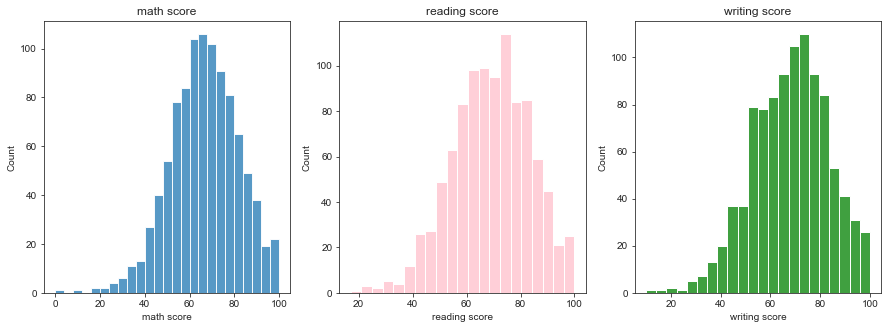

In [7]:
# 연속형 변수(target)의 데이터 분포 확인
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.histplot(data['math score'],ax=ax1)
sns.histplot(data['reading score'],ax=ax2,color="pink")
sns.histplot(data['writing score'],ax=ax3,color="green")
ax1.set_title("math score")
ax2.set_title("reading score")
ax3.set_title("writing score")

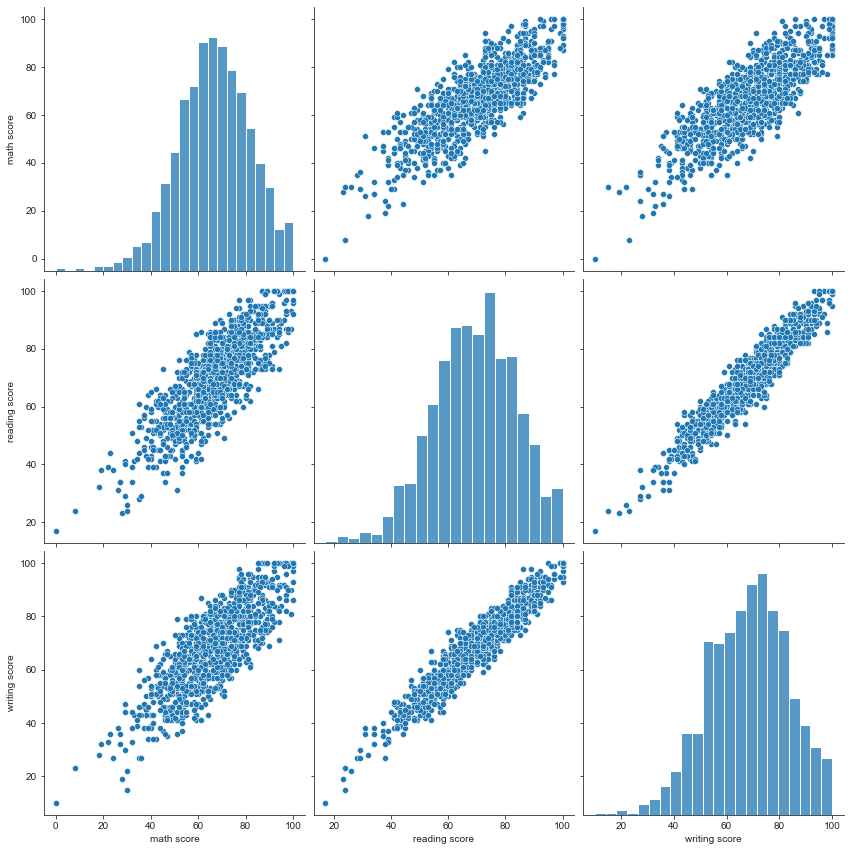

In [69]:
# 수학, 읽기, 쓰기 성적간의 상관관계도
sns.pairplot(data[['math score','reading score','writing score']],height=4)

In [8]:
# 세 성적의 분포가 비슷함, 또한 성적이라는 결과를 예측해내기 위해 세 성적을 합산
# 성적(수학, 읽기, 쓰기) 정보를 합쳐서 총합 성적이라는 새로운 target 생성
y_target = data['math score'] + data['reading score'] + data['writing score']

# 전체 데이터에서 성적 데이터 삭제
data_data = data.drop(['math score','reading score','writing score'], axis = 1, inplace= False)

In [9]:
# target data 출력
y_target.head()

0    218
1    247
2    278
3    148
4    229
dtype: int64

In [10]:
# data 출력
data_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [11]:
# 원핫인코딩
one_data = pd.get_dummies(data_data)

# category가 2개인 feature는 원 핫 인코딩이 필요없으므로 불필요한 열 삭제
x_data = one_data.drop(['gender_female','lunch_free/reduced','test preparation course_none'],axis=1, inplace=False)

In [12]:
# 데이터 출력
x_data

,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_completed
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,1,0,1,1
2,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,0,0,0,1,0,0,1,1
996,1,0,0,1,0,0,0,0,1,0,0,0,0,0
997,0,0,0,1,0,0,0,0,1,0,0,0,0,1
998,0,0,0,0,1,0,0,0,0,0,1,0,1,1


In [13]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data,y_target,test_size=0.2,random_state=56)

x_train.head()

,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_completed
752,1,0,0,1,0,0,0,0,0,1,0,0,0,1
359,0,0,0,0,1,0,0,0,0,0,1,0,1,0
493,0,0,0,1,0,0,0,1,0,0,0,0,1,0
419,1,0,0,0,0,1,0,0,1,0,0,0,0,1
924,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [14]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# cross validation을 통한 linear regression의 rmse측정
lr = LinearRegression()
mse = cross_val_score(lr,x_data,y_target,scoring="neg_mean_squared_error",cv =5)
avg_rmse = np.mean(np.sqrt(-1 *mse))
print("RMSE : ",np.round(avg_rmse,4))

RMSE :  37.7705


In [35]:
# cross validation으로 ridge regression의 최적 알파값을 찾고 해당 모델의 rmse값 측정
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

params = [i/10 for i in range(1,501)]
rmse_list = [[],[]]

for param in params:
    model = Ridge(alpha=param)
    mse = cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv =5)
    avg_rmse = np.mean(np.sqrt(-1 *mse))
    rmse_list[0].append(avg_rmse)
    rmse_list[1].append(param)

In [39]:
# best alpha 값은 6.5
idx = rmse_list[0].index(min(rmse_list[0]))
rmse_list[1][idx]

6.5

In [41]:
# ridge 모델의 RMSE
np.round(min(rmse_list[0]),4)

37.2441

<AxesSubplot:>

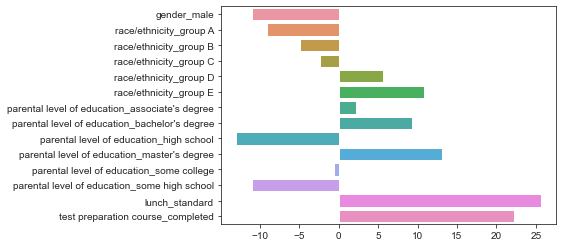

In [40]:
# feature 시각화
model = Ridge(alpha=6.5)
model.fit(x_data,y_target)

coeff = pd.Series(data=model.coef_,index=x_data.columns)

sns.barplot(x=coeff.values,y=coeff.index)

In [43]:
# cross validation으로 lasso regression의 최적 알파값을 찾고 해당 모델의 rmse값 측정
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

params = [i/10 for i in range(1,501)]
rmse_list = [[],[]]

for param in params:
    model = Lasso(alpha=param)
    mse = cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv =5)
    avg_rmse = np.mean(np.sqrt(-1 *mse))
    rmse_list[0].append(avg_rmse)
    rmse_list[1].append(param)

In [60]:
# 최적 alpha값이 0.1로 측정되었기 때문에 세분화시켜서 다시 측정
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

params = [i/100 for i in range(1,10)]
rmse_list = [[],[]]

for param in params:
    model = Lasso(alpha=param)
    mse = cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv =5)
    avg_rmse = np.mean(np.sqrt(-1 *mse))
    rmse_list[0].append(avg_rmse)
    rmse_list[1].append(param)

In [61]:
# best alpha 값은 6.5
idx = rmse_list[0].index(min(rmse_list[0]))
rmse_list[1][idx]

0.07

<AxesSubplot:>

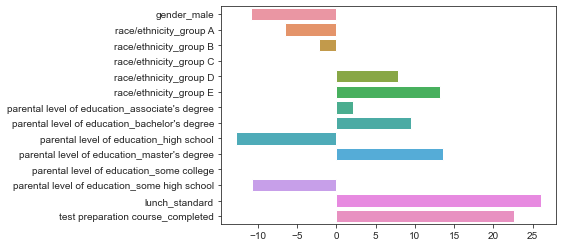

In [62]:
# feature 시각화
model = Lasso(alpha=0.07)
model.fit(x_data,y_target)

coeff = pd.Series(data=model.coef_,index=x_data.columns)

sns.barplot(x=coeff.values,y=coeff.index)

In [63]:
# Lasso 모델의 RMSE
np.round(min(rmse_list[0]),4)

37.2563

In [51]:
# Elastic Net
# cross validation으로 lasso regression의 최적 알파값을 찾고 해당 모델의 rmse값 측정
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np

params = [i/10 for i in range(1,501)]
rmse_list = [[],[]]

for param in params:
    model = ElasticNet(alpha=param)
    mse = cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv =5)
    avg_rmse = np.mean(np.sqrt(-1 *mse))
    rmse_list[0].append(avg_rmse)
    rmse_list[1].append(param)

In [64]:
# alpha를 세분화하여 다시 모델링
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np

params = [i/100 for i in range(1,10)]
rmse_list = [[],[]]

for param in params:
    model = ElasticNet(alpha=param)
    mse = cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv =5)
    avg_rmse = np.mean(np.sqrt(-1 *mse))
    rmse_list[0].append(avg_rmse)
    rmse_list[1].append(param)

In [65]:
# best alpha 값은 6.5
idx = rmse_list[0].index(min(rmse_list[0]))
rmse_list[1][idx]

0.02

In [66]:
# ElasticNet 모델의 RMSE
np.round(min(rmse_list[0]),4)

37.2463

<AxesSubplot:>

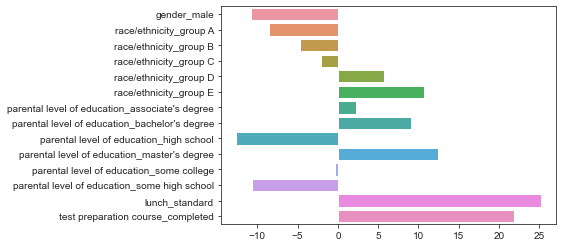

In [67]:
# feature 시각화
model = ElasticNet(alpha=0.02)
model.fit(x_data,y_target)

coeff = pd.Series(data=model.coef_,index=x_data.columns)

sns.barplot(x=coeff.values,y=coeff.index)

#### 결과
Linear Regression RMSE : RMSE :  37.7705<br/>
Ridge Regression RMSE : 37.2441<br/>
Lasso Regression RMSE : 37.2563<br/>
Elastic Net RMSE : 37.2463<br/>
<br/>
4개의 모델 중  cross validation의 결과가 가장 좋은 Ridge Regression Model을 채택

In [26]:
# 최종 모델에 대한 test set에 대한 성능평가
from sklearn.metrics import mean_squared_error
final_model = Ridge(alpha=6.5)
final_model.fit(x_train,y_train)
pred_ridge = final_model.predict(x_test)
mse = mean_squared_error(y_test,pred_ridge)
rmse = np.sqrt(mse)
print(np.round(rmse,4))

39.2536
